# Entrenamiento, evaluacion y archivado de modelo para aplicacion Web Caso de estudio #3

## Capitulo 4

In [1]:
# librerias
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from scipy.io import loadmat
import pandas_profiling

from numpy.random import seed
seed(0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from plot_metric.functions import BinaryClassification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from matplotlib import pyplot
import pickle
import joblib

from sklearn.metrics import log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
from numpy import arange
from pprint import pprint
from sklearn.metrics import fbeta_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from xgboost import plot_tree
from time import time
from sklearn.model_selection import StratifiedKFold

In [2]:
# BINARIA funcion para generar matriz de confusion y medidas de desempeño del modelos clasificacion binarios
def model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
    print('\n')
    print("MATRIZ DE CONFUSION")
    print('\n')
    matriz = confusion_matrix(label_test, label_pred)
    #print(matriz)
    classes = ["Saludable","Falla Pista Interna"]
    cm = ConfusionMatrix(modelo, classes=classes, label_encoder={0:"Saludable", 1:"Falla Pista Interna"})
    cm.fit(data_train, label_train)
    cm.score(data_test, label_test)
    cm.show()
    # Medidas de desempeño del modelo
    print('\n')
    print("MEDIDAS DE DESEMPEÑO DEL MODELO")
    print('\n')
    print('Exactitud - Accuracy: {}'.format(modelo.score(data_test, label_test)))
    print('ROC AUC: {}'.format (metrics.roc_auc_score(label_test, label_pred)))
    print('-'*60)
    print('Precisión por clase: {}'.format(metrics.precision_score(label_test, label_pred, average=None)))
    print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test, label_pred, average=None)))
    print('F1 por clase: {}'.format(metrics.f1_score(label_test, label_pred, average=None)))
    print('-'*60)
    print('F1 Macro: {}'.format(metrics.f1_score(label_test, label_pred, average='macro')))
    print('F1 Micro: {}'.format(metrics.f1_score(label_test, label_pred, average='micro')))
    print('F1 Weighted: {}'.format(metrics.f1_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test, label_pred, average='macro')))
    print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test, label_pred, average='micro')))
    print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Precisión Macro: {}'.format(metrics.precision_score(label_test, label_pred, average='macro')))
    print('Precisión Micro: {}'.format(metrics.precision_score(label_test, label_pred, average='micro')))
    print('Precisión Weighted: {}'.format(metrics.precision_score(label_test, label_pred, average='weighted')))
    
    TP = matriz[1][1]
    TN = matriz[0][0]
    FP = matriz[0][1]
    FN = matriz[1][0]
    print('-'*60)
    print('Verdaderos positivos - True Positives:', TP)
    print('Verdaderos negativos - True Negatives:', TN)
    print('Falsos positivos - False Positives:', FP)
    print('Falsos negativos - False Negatives:', FN)
        # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
        # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
        # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
    conf_specificity = (TN / float(TN + FN))
        # calculate precision
    conf_precision = (TP / float(TP + FP))
        # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        # calculate FPR tasa de falsos positivos
    conf_FPR = 1 - conf_specificity
    print('-'*60)
    print(f'Error de clasificacion: {round(conf_misclassification,3)}') 
    print(f'Especificidad - Specificity: {round(conf_specificity,3)}') 
    print(f'Tasa de falsos positivos FPR: {round(conf_FPR,3)}')
    print('-'*60)
   
    print(classification_report(label_test, label_pred))
    # curva ROC clasificacion binaria
    bc = BinaryClassification(label_test, label_pred, labels=["Class 0", "Class 1"])
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    print('\n')
    print("CURVA ROC")
    plt.show()

## Datos rodamiento en estado saludable

Archivos:
* H-A-1:Datos recopilados estado saludable 
* H-A-3:Datos recopilados estado saludable 



In [3]:
# importar datos de archivo matlab
HA1 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\H-A-1.mat')

In [4]:
# ver diccionario
HA1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 15:18:50 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[-0.00219944],
        [-0.0018706 ],
        [-0.00154175],
        ...,
        [ 0.00963905],
        [ 0.0093102 ],
        [ 0.00898136]]),
 'Channel_2': array([[4.18876708],
        [4.20060302],
        [4.20816487],
        ...,
        [0.03700339],
        [0.03634584],
        [4.14010822]])}

In [5]:
# nombres de variables
HA1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [6]:
# convertir a dataframe la columna aceleracion
HA11=pd.DataFrame(HA1['Channel_1'], columns = ['aceleracion'])
HA11.head()

,aceleracion
0,-0.002199
1,-0.001871
2,-0.001542
3,-0.001871
4,-0.002199


In [7]:
# convertir a dataframe la columna velocidad
HA12=pd.DataFrame(HA1['Channel_2'], columns = ['velocidad'])
HA12.head()

,velocidad
0,4.188767
1,4.200603
2,4.208165
3,4.226576
4,4.240385


In [8]:
# concatenar los dos Dataframe
H1train = pd.concat([HA11, HA12], axis=1, sort=False)
H1train.head()

,aceleracion,velocidad
0,-0.002199,4.188767
1,-0.001871,4.200603
2,-0.001542,4.208165
3,-0.001871,4.226576
4,-0.002199,4.240385


In [9]:
print("numero de dimensiones =", H1train.ndim)
print("tamaño de la tabla  =", H1train.shape)
print("total datos =", H1train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [10]:
#hallar si hay nul o NaN
H1train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [11]:
H1train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [12]:
H1train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

las bases no contienen observaciones con NaN o nul

## Etiquetado de datos

In [13]:
H1train.head()

,aceleracion,velocidad
0,-0.002199,4.188767
1,-0.001871,4.200603
2,-0.001542,4.208165
3,-0.001871,4.226576
4,-0.002199,4.240385


In [14]:
# etiquetado de la columna falla, etiqueta 0 corresponde a estado saludable o normal
H1train['falla'] = 0
H1train.head()

,aceleracion,velocidad,falla
0,-0.002199,4.188767,0
1,-0.001871,4.200603,0
2,-0.001542,4.208165,0
3,-0.001871,4.226576,0
4,-0.002199,4.240385,0


In [15]:
# asignar numero de ID al rodamiento
H1train.insert(0, 'id', 1)
H1train.head()

,id,aceleracion,velocidad,falla
0,1,-0.002199,4.188767,0
1,1,-0.001871,4.200603,0
2,1,-0.001542,4.208165,0
3,1,-0.001871,4.226576,0
4,1,-0.002199,4.240385,0


In [16]:
# importar datos de archivo matlab del segundo rodamiento en estado saludable
HA3 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\H-A-3.mat')

In [17]:
HA3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 15:21:21 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[ 0.00174672],
        [ 0.00076018],
        [-0.00450137],
        ...,
        [ 0.02706795],
        [ 0.02969873],
        [ 0.02871218]]),
 'Channel_2': array([[0.03667461],
        [0.02812651],
        [0.03634584],
        ...,
        [4.27293377],
        [0.03700339],
        [0.03667461]])}

In [18]:
HA3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [19]:
HA31=pd.DataFrame(HA3['Channel_1'], columns = ['aceleracion'])
HA31.head()

,aceleracion
0,0.001747
1,0.000760
2,-0.004501
3,0.000102
4,0.002404


In [20]:
HA32=pd.DataFrame(HA3['Channel_2'], columns = ['velocidad'])
HA32.head()

,velocidad
0,0.036675
1,0.028127
2,0.036346
3,0.036346
4,0.036017


In [21]:
# concatenar los dos DF

H3train = pd.concat([HA31, HA32], axis=1, sort=False)
H3train.head()

,aceleracion,velocidad
0,0.001747,0.036675
1,0.000760,0.028127
2,-0.004501,0.036346
3,0.000102,0.036346
4,0.002404,0.036017


In [22]:
print("numero de dimensiones =", H3train.ndim)
print("tamaño de la tabla  =", H3train.shape)
print("total datos =", H3train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [23]:
#hallar si hay nul o NaN
H3train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [24]:
H3train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [25]:
H3train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

## Etiquetado de datos

In [26]:
H3train.head()

,aceleracion,velocidad
0,0.001747,0.036675
1,0.000760,0.028127
2,-0.004501,0.036346
3,0.000102,0.036346
4,0.002404,0.036017


In [27]:
H3train['falla'] = 0
H3train.head()

,aceleracion,velocidad,falla
0,0.001747,0.036675,0
1,0.000760,0.028127,0
2,-0.004501,0.036346,0
3,0.000102,0.036346,0
4,0.002404,0.036017,0


In [28]:
H3train.insert(0, 'id', 1)
H3train.head()

,id,aceleracion,velocidad,falla
0,1,0.001747,0.036675,0
1,1,0.000760,0.028127,0
2,1,-0.004501,0.036346,0
3,1,0.000102,0.036346,0
4,1,0.002404,0.036017,0


## Datos recopilados de un rodamiento con falla en pista interna

Archivos:
* I-A-1:Datos recopilados estado falla pista interna 
* I-A-3:Datos recopilados estado falla pista interna 



In [29]:
# importar datos de archivo matlab datos rodamiento falla en pista interna
IA1 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\I-A-1.mat')

In [30]:
IA1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 17:52:06 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[0.24871092],
        [0.24903977],
        [0.24838208],
        ...,
        [0.32927848],
        [0.26581098],
        [0.1648549 ]]),
 'Channel_2': array([[0.0379897 ],
        [0.03766093],
        [0.0379897 ],
        ...,
        [4.20684976],
        [4.22887776],
        [4.29200278]])}

In [31]:
IA1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [32]:
IA11=pd.DataFrame(IA1['Channel_1'], columns = ['aceleracion'])
IA11.head()

,aceleracion
0,0.248711
1,0.249040
2,0.248382
3,0.250355
4,0.251013


In [33]:
IA12=pd.DataFrame(IA1['Channel_2'], columns = ['velocidad'])
IA12.head()

,velocidad
0,0.037990
1,0.037661
2,0.037990
3,0.037661
4,0.037332


In [34]:
# concatenar los dos DF

I1train = pd.concat([IA11, IA12], axis=1, sort=False)
I1train.head()

,aceleracion,velocidad
0,0.248711,0.037990
1,0.249040,0.037661
2,0.248382,0.037990
3,0.250355,0.037661
4,0.251013,0.037332


In [35]:
print("numero de dimensiones =", I1train.ndim)
print("tamaño de la tabla  =", I1train.shape)
print("total datos =", I1train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [36]:
#hallar si hay nul o NaN
I1train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [37]:
I1train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [38]:
I1train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

## Etiquetado de datos

In [39]:
I1train.head()

,aceleracion,velocidad
0,0.248711,0.037990
1,0.249040,0.037661
2,0.248382,0.037990
3,0.250355,0.037661
4,0.251013,0.037332


In [40]:
# etiquetado de datos, asignacion etiqueta =1 que correspode a falla en pista interna
I1train['falla'] = 1
I1train.head()

,aceleracion,velocidad,falla
0,0.248711,0.037990,1
1,0.249040,0.037661,1
2,0.248382,0.037990,1
3,0.250355,0.037661,1
4,0.251013,0.037332,1


In [41]:
I1train.insert(0, 'id', 1)
I1train.head()

,id,aceleracion,velocidad,falla
0,1,0.248711,0.037990,1
1,1,0.249040,0.037661,1
2,1,0.248382,0.037990,1
3,1,0.250355,0.037661,1
4,1,0.251013,0.037332,1


In [42]:
# importar datos de archivo matlab del segundo rodamiento con falla en pista interna
IA3 = loadmat (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\bases de datos vibraciones\rodamientos variando velocidad\datos de vibraciones\I-A-3.mat')

In [43]:
IA3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 09 17:52:19 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_1': array([[-0.01403794],
        [-0.007461  ],
        [-0.00252829],
        ...,
        [ 0.01818908],
        [-0.00088406],
        [ 0.00043133]]),
 'Channel_2': array([[0.03766093],
        [3.61998493],
        [4.17397216],
        ...,
        [4.25583741],
        [0.03733216],
        [0.03766093]])}

In [44]:
IA3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_1', 'Channel_2'])

In [45]:
IA31=pd.DataFrame(IA3['Channel_1'], columns = ['aceleracion'])
IA31.head()

,aceleracion
0,-0.014038
1,-0.007461
2,-0.002528
3,0.000431
4,-0.002199


In [46]:
IA32=pd.DataFrame(IA3['Channel_2'], columns = ['velocidad'])
IA32.head()

,velocidad
0,0.037661
1,3.619985
2,4.173972
3,4.198302
4,4.213425


In [47]:
# concatenar los dos DF

I3train = pd.concat([IA31, IA32], axis=1, sort=False)
I3train.head()

,aceleracion,velocidad
0,-0.014038,0.037661
1,-0.007461,3.619985
2,-0.002528,4.173972
3,0.000431,4.198302
4,-0.002199,4.213425


In [48]:
print("numero de dimensiones =", I3train.ndim)
print("tamaño de la tabla  =", I3train.shape)
print("total datos =", I3train.size)

numero de dimensiones = 2
tamaño de la tabla  = (2000000, 2)
total datos = 4000000


In [49]:
#hallar si hay nul o NaN
I3train.isnull().any()

aceleracion    False
velocidad      False
dtype: bool

In [50]:
I3train.isna().any()

aceleracion    False
velocidad      False
dtype: bool

In [51]:
I3train.isnull().sum()

aceleracion    0
velocidad      0
dtype: int64

## Etiquetado de datos

In [52]:
I3train.head()

,aceleracion,velocidad
0,-0.014038,0.037661
1,-0.007461,3.619985
2,-0.002528,4.173972
3,0.000431,4.198302
4,-0.002199,4.213425


In [53]:
I3train['falla'] = 1
I3train.head()

,aceleracion,velocidad,falla
0,-0.014038,0.037661,1
1,-0.007461,3.619985,1
2,-0.002528,4.173972,1
3,0.000431,4.198302,1
4,-0.002199,4.213425,1


In [54]:
I3train.insert(0, 'id', 1)
I3train.head()

,id,aceleracion,velocidad,falla
0,1,-0.014038,0.037661,1
1,1,-0.007461,3.619985,1
2,1,-0.002528,4.173972,1
3,1,0.000431,4.198302,1
4,1,-0.002199,4.213425,1


## Concatenar las bases

In [55]:
# concatenar
train=pd.concat([H1train, I3train], ignore_index=True)
train.head()

,id,aceleracion,velocidad,falla
0,1,-0.002199,4.188767,0
1,1,-0.001871,4.200603,0
2,1,-0.001542,4.208165,0
3,1,-0.001871,4.226576,0
4,1,-0.002199,4.240385,0


In [56]:
train.tail()

,id,aceleracion,velocidad,falla
3999995,1,0.081657,4.181863,1
3999996,1,0.053705,4.117094,1
3999997,1,0.018189,4.255837,1
3999998,1,-0.000884,0.037332,1
3999999,1,0.000431,0.037661,1


In [57]:
train.shape


(4000000, 4)

Tamaño de la base 8 millones de observaciones 

In [58]:
# borrar la columna id

train.drop('id', axis=1, inplace=True)
train.head()

,aceleracion,velocidad,falla
0,-0.002199,4.188767,0
1,-0.001871,4.200603,0
2,-0.001542,4.208165,0
3,-0.001871,4.226576,0
4,-0.002199,4.240385,0


In [59]:
# separar datos de etiquetas

data_train=train.iloc[:,np.r_[0:2]]
label_train=train.iloc[:,2]

In [60]:
label_train.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

In [61]:
# conteo de observaciones etiquetadas con 1 y 0 en la base train
label_train.value_counts(sort=False)

0    2000000
1    2000000
Name: falla, dtype: int64

In [62]:
data_train.head()

,aceleracion,velocidad
0,-0.002199,4.188767
1,-0.001871,4.200603
2,-0.001542,4.208165
3,-0.001871,4.226576
4,-0.002199,4.240385


In [63]:
label_train.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

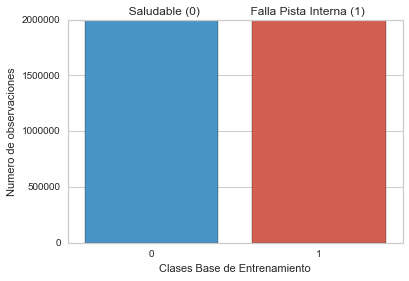

In [64]:
# grafica de clases base de train, estado base equilibrada
sns.countplot(label_train, palette=["#3498db", "#e74c3c"])
plt.title('       Saludable (0)               Falla Pista Interna (1)')
plt.xlabel("Clases Base de Entrenamiento")
plt.ylabel("Numero de observaciones")
plt.savefig('vibraciones entrenamientoapp.png')
pyplot.show()

## Concatenar las bases test

In [65]:
# concatenar
test=pd.concat([H3train, I1train], ignore_index=True)
test.head()

,id,aceleracion,velocidad,falla
0,1,0.001747,0.036675,0
1,1,0.000760,0.028127,0
2,1,-0.004501,0.036346,0
3,1,0.000102,0.036346,0
4,1,0.002404,0.036017,0


In [66]:
test.tail()

,id,aceleracion,velocidad,falla
3999995,1,0.408531,0.037332,1
3999996,1,0.371371,4.076983,1
3999997,1,0.329278,4.206850,1
3999998,1,0.265811,4.228878,1
3999999,1,0.164855,4.292003,1


In [67]:
test.shape


(4000000, 4)

Tamaño de la base 8 millones de observaciones 

In [68]:
# borrar la columna id

test.drop('id', axis=1, inplace=True)
test.head()

,aceleracion,velocidad,falla
0,0.001747,0.036675,0
1,0.000760,0.028127,0
2,-0.004501,0.036346,0
3,0.000102,0.036346,0
4,0.002404,0.036017,0


In [69]:
# separar datos de etiquetas

data_test=test.iloc[:,np.r_[0:2]]
label_test=test.iloc[:,2]

In [70]:
label_test.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

In [71]:
# conteo de observaciones etiquetadas con 1 y 0 en la base train
label_test.value_counts(sort=False)

0    2000000
1    2000000
Name: falla, dtype: int64

In [72]:
data_test.head()

,aceleracion,velocidad
0,0.001747,0.036675
1,0.000760,0.028127
2,-0.004501,0.036346
3,0.000102,0.036346
4,0.002404,0.036017


In [73]:
label_test.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

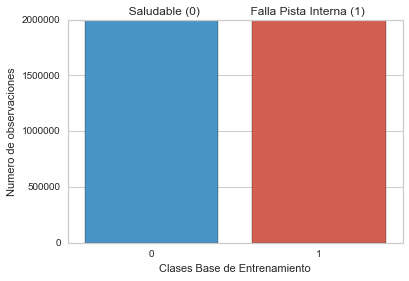

In [74]:
# grafica de clases base de train, estado base equilibrada
sns.countplot(label_test, palette=["#3498db", "#e74c3c"])
plt.title('       Saludable (0)               Falla Pista Interna (1)')
plt.xlabel("Clases Base de Entrenamiento")
plt.ylabel("Numero de observaciones")
plt.savefig('vibraciones entrenamientoapp.png')
pyplot.show()

# Modelo de clasificacion binaria Gradient Boosting con hiperparametros ajustados 

El proceso de ajuste avanzado de hiperparamtros se puede consultar en la carpeta capitulo 3, carpeta seccion 3.4.3, el cuaderno 3_Ajuste avanzado XGBoost y GBR.ipynb

In [75]:
modelo1=GradientBoostingClassifier(max_depth=2, n_estimators=600, learning_rate=0.001, subsample=1, random_state=0)
modelo1.fit(data_train, label_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)



MATRIZ DE CONFUSION




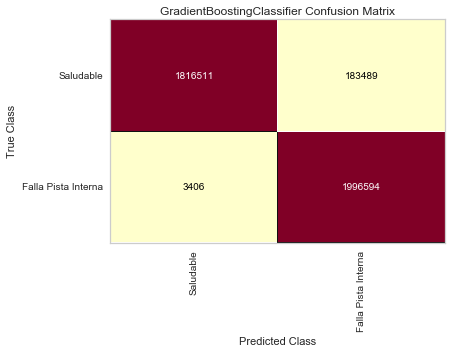



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.95327625
ROC AUC: 0.95327625
------------------------------------------------------------
Precisión por clase: [0.99812849 0.91583394]
Sensibilidad - Recall por clase: [0.9082555 0.998297 ]
F1 por clase: [0.95107354 0.95528917]
------------------------------------------------------------
F1 Macro: 0.9531813547894704
F1 Micro: 0.95327625
F1 Weighted: 0.9531813547894704
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.95327625
Sensibilidad - Recall Micro: 0.95327625
Sensibilidad - Recall Weighted: 0.95327625
------------------------------------------------------------
Precisión Macro: 0.9569812122559648
Precisión Micro: 0.95327625
Precisión Weighted: 0.9569812122559648
------------------------------------------------------------
Verdaderos positivos - True Positives: 1996594
Verdaderos negativos - True Negatives: 1816511
Falsos positivos - False Positives: 183489
Falsos negativos - Fals

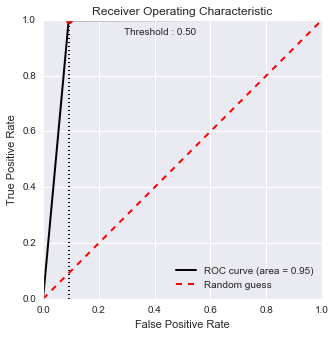

In [77]:
# prediccion con el modelo

label_pred1 = modelo1.predict(data_test)

model_evaluation(data_train, label_train, data_test, label_test, modelo1, label_pred1)

Se concluye que con el modelo XGBoost Classifier ajustado se obtiene un F1 macro con 95.32% 

## Pruebas de formatos para grabar modelos entrenados

In [78]:
# grabar el modelo entrenado al disco en formato .sav
filename = 'modelo1sav.sav'
pickle.dump(modelo1, open(filename, 'wb'))

In [79]:
# grabar el modelo entrenado al disco en formato joblib
filename = 'modelo1gbjoblib.sav'
joblib.dump(modelo1, filename)

['modelo1gbjoblib.sav']

In [80]:
# grabar el modelo entrenado al disco en formato pickle
filename = 'modelo1pkl.pkl'
pickle.dump(modelo1, open(filename, 'wb'))

In [81]:
# Leer el modelo del disco .sav 
filename = 'modelo1sav.sav'
loaded_model = pickle.load(open(filename, 'rb'))




MATRIZ DE CONFUSION




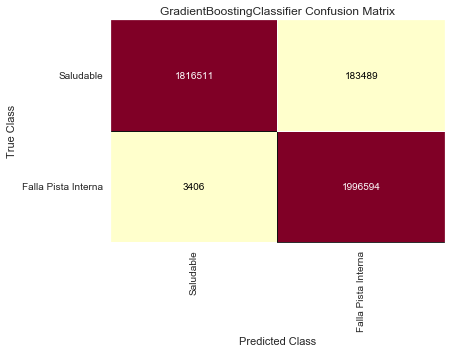



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.95327625
ROC AUC: 0.95327625
------------------------------------------------------------
Precisión por clase: [0.99812849 0.91583394]
Sensibilidad - Recall por clase: [0.9082555 0.998297 ]
F1 por clase: [0.95107354 0.95528917]
------------------------------------------------------------
F1 Macro: 0.9531813547894704
F1 Micro: 0.95327625
F1 Weighted: 0.9531813547894704
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.95327625
Sensibilidad - Recall Micro: 0.95327625
Sensibilidad - Recall Weighted: 0.95327625
------------------------------------------------------------
Precisión Macro: 0.9569812122559648
Precisión Micro: 0.95327625
Precisión Weighted: 0.9569812122559648
------------------------------------------------------------
Verdaderos positivos - True Positives: 1996594
Verdaderos negativos - True Negatives: 1816511
Falsos positivos - False Positives: 183489
Falsos negativos - Fals

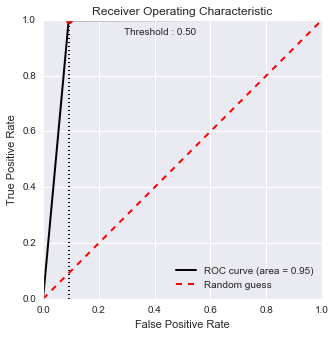

In [82]:
# prediccion y prueba de evaluacion con el modelo guardado en disco
label_pred_load1 = loaded_model.predict(data_test)
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, loaded_model, label_pred_load1)

Si comparamos los resultados de la evaluacion de entrenamiento y el modelo guardado se concluye que la evaluacion es exitosa ya que entrega iguales resultados

In [83]:
# prueba con modelo joblib
# Leer el modelo del disco joblib
filename = 'modelo1gbjoblib.sav'
loaded_model2 = joblib.load(filename)




MATRIZ DE CONFUSION




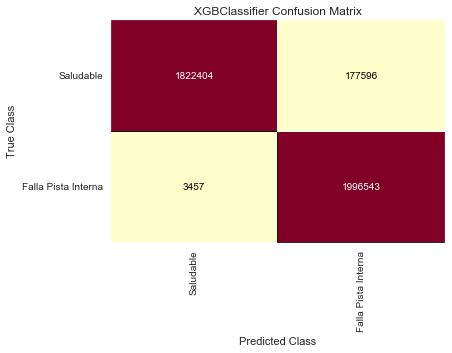



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.95473675
ROC AUC: 0.9547367499999999
------------------------------------------------------------
Precisión por clase: [0.99810665 0.91831433]
Sensibilidad - Recall por clase: [0.911202  0.9982715]
F1 por clase: [0.95267653 0.95662507]
------------------------------------------------------------
F1 Macro: 0.9546508008211254
F1 Micro: 0.95473675
F1 Weighted: 0.9546508008211254
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9547367499999999
Sensibilidad - Recall Micro: 0.95473675
Sensibilidad - Recall Weighted: 0.95473675
------------------------------------------------------------
Precisión Macro: 0.958210488540472
Precisión Micro: 0.95473675
Precisión Weighted: 0.958210488540472
------------------------------------------------------------
Verdaderos positivos - True Positives: 1996543
Verdaderos negativos - True Negatives: 1822404
Falsos positivos - False Positives: 177596
Falsos ne

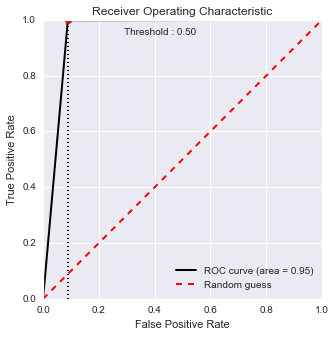

In [84]:
# prediccion y prueba de evaluacion con el modelo guardado en disco
label_pred_load2 = loaded_model2.predict(data_test)
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, loaded_model2, label_pred_load2)

In [83]:
# Leer el modelo del disco .pkl 
filename = 'modelo1pkl.pkl'
loaded_model3 = pickle.load(open(filename, 'rb'))



MATRIZ DE CONFUSION




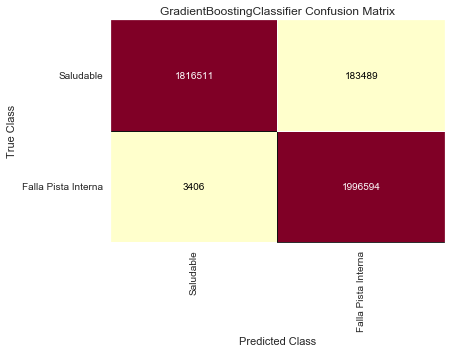



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.95327625
ROC AUC: 0.95327625
------------------------------------------------------------
Precisión por clase: [0.99812849 0.91583394]
Sensibilidad - Recall por clase: [0.9082555 0.998297 ]
F1 por clase: [0.95107354 0.95528917]
------------------------------------------------------------
F1 Macro: 0.9531813547894704
F1 Micro: 0.95327625
F1 Weighted: 0.9531813547894704
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.95327625
Sensibilidad - Recall Micro: 0.95327625
Sensibilidad - Recall Weighted: 0.95327625
------------------------------------------------------------
Precisión Macro: 0.9569812122559648
Precisión Micro: 0.95327625
Precisión Weighted: 0.9569812122559648
------------------------------------------------------------
Verdaderos positivos - True Positives: 1996594
Verdaderos negativos - True Negatives: 1816511
Falsos positivos - False Positives: 183489
Falsos negativos - Fals

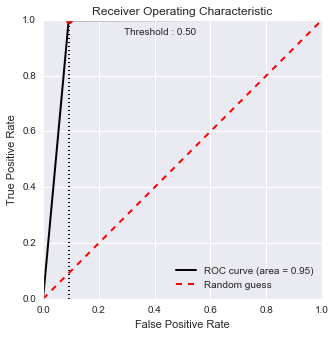

In [84]:
# prediccion y prueba de evaluacion con el modelo guardado en disco
label_pred_load3 = loaded_model3.predict(data_test)
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, loaded_model3, label_pred_load3)

Si comparamos los resultados de la evaluacion de entrenamiento y el modelo guardado se concluye que la evaluacion es exitosa ya que entrega iguales resultados.

## Pruebas de prediccion de datos de velocidad y aceleracion 

In [85]:
# prediccion de un nuevo dato

# prueba con modelo joblib
# Leer el modelo del disco joblib

filename = 'modelo1gbjoblib.sav'
loaded_model5 = joblib.load(filename)

nuevo_dato1 = np.array([[0.199713, 4.323565]])

# Ahora encontramos la etiqueta o clase de este nuevo individuo
label_pred_load21 = loaded_model5.predict(nuevo_dato1)


In [86]:
#etiqueta_nueva_dato1 = 
print("Etiqueta nuevo dato: ", label_pred_load21)

Etiqueta nuevo dato:  [1]


Prediccion correcta

In [87]:
# prediccion de un nuevo dato

# prueba con modelo pkl
# Leer el modelo del disco pkl

filename = 'modelo1pkl.pkl'
loaded_model6 = pickle.load(open(filename, 'rb'))

nuevo_dato1 = np.array([[0.199713, 4.323565]])

# Ahora encontramos la etiqueta o clase de este nuevo individuo
label_pred_load21 = loaded_model6.predict(nuevo_dato1)


In [88]:
#etiqueta_nueva_dato1 = 
print("Etiqueta nuevo dato: ", label_pred_load21)

Etiqueta nuevo dato:  [1]


In [89]:
# prediccion de un nuevo dato data frame

data2 = {'aceleracion':[0.002404], 'velocidad':[0.036017]} 
  
# Create DataFrame 
df2 = pd.DataFrame(data2)

# Ahora encontramos la etiqueta o clase de este nuevo individuo
label_pred_load62 = loaded_model6.predict(df2)

In [90]:

print("Etiqueta nuevo dato: ", label_pred_load62)

Etiqueta nuevo dato:  [0]


Al comparar el resultado de clasificacion del modelo con el estado real del rodamiento se concluye que es correcta la clasificacion de estado normal

In [91]:
# prediccion de un nuevo dato formato array

nuevo_dato2 = np.array([[0.012270, 4.232166]])

# Ahora encontramos la etiqueta o clase de este nuevo individuo
label_pred_load22 = loaded_model6.predict(nuevo_dato2)
print("Etiqueta nuevo dato: ", label_pred_load22)


Etiqueta nuevo dato:  [0]


La ventaja del algoritmo Gradient Boosting con respecto a XGBoost es que soporta para las predicciones formatos de dataframe y array

## calculo de probabilidades de clase 

In [92]:
# https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/

# prediccion de probabilidades data test
probs = loaded_model6.predict_proba(data_test)
print(probs)



[[0.6118703  0.3881297 ]
 [0.6118703  0.3881297 ]
 [0.6118703  0.3881297 ]
 ...
 [0.29408338 0.70591662]
 [0.29408338 0.70591662]
 [0.29408338 0.70591662]]


In [93]:
# calculo del indice score Log loss “logistic loss,” “logarithmic loss,” o “cross entropy”
# puede usarse como una medida para evaluar las probabilidades predichas

# predecir probabilidades
probs = loaded_model6.predict_proba(data_test)
# mantener predicciones de clase 1 solamente 
probs = probs[:, 1]
# calcular log loss
loss = log_loss(label_test, probs)
print(loss)
# el modelo con perfecto desempeño se acerca a 0, en este caso es 0.45

0.45959828398058833


In [95]:
# Predecir probabilidades de una observacion 
#dato 2
probs1 = loaded_model6.predict_proba(nuevo_dato1)
# keep the predictions for class 1 only
print(probs1)
# con el 70.6% de probabilidad esta observacion es de clase 1 falla en pista interna

[[0.29408338 0.70591662]]


In [97]:
# Predecir probabilidades de una observacion 
# dato 3

data3 = {'aceleracion':[0.011941], 'velocidad':[0.036675]} 
  
# Create DataFrame 
df3 = pd.DataFrame(data3)

# Ahora encontramos la etiqueta o clase de este nuevo individuo
label_pred_load63 = loaded_model6.predict(df3)
#etiqueta_nueva_dato
print("Etiqueta nuevo dato: ", label_pred_load63)

# predict probabilities
#dato 3
probs3 = loaded_model6.predict_proba(df3)
# keep the predictions for class 1 only
print("probabilidades:", probs3)
# calculate log loss


Etiqueta nuevo dato:  [0]
probabilidades: [[0.60036322 0.39963678]]


El dato corresponde a clase 0 (estado normal) con un probabilidad del 60%, evaluacion correcta

## Reentrenamiento del modelo ajustado con el 100% de los datos


Después de explorar la configuración apropiada de los algoritmos de ML y realizar una búsqueda automática en cuadrícula con validación cruzada K-fold estratificada para ajustar los hiperparámetros, se procede a evaluar el desempeño de los modelos en los datos de prueba (test), con el modelo seleccionado el paso subsecuente es agrupar el conjunto de datos de entrenamiento y prueba con el propósito de entrenar de nuevo el modelo y guardarlo para hacer predicciones, se deben reunir todos los datos en un gran conjunto de datos de entrenamiento y ajustarlos a su modelo. En otros términos, se finaliza con un modelo con la configuración seleccionada en todos los datos disponibles, en este paso ya no hay división de entrenamiento y prueba ni tampoco pliegues de validación cruzada, debido a que se está guardando el modelo para una aplicación operativa posterior con datos no observados; la habilidad del modelo ajustado con los datos de entrenamiento se evaluó con los datos de prueba en la etapa preliminar al proceso de almacenado del modelo final mitigando los riesgos de sobreajuste, además la principal ventaja de esta técnica es que se utilizan el 100\% de los datos disponibles para entrenar el modelo final y prepararlo apropiadamente para la predicción de nuevos datos en un entorno de producción aplicado.

## Concatenar las bases

In [98]:
# concatenar
train=pd.concat([H1train, I1train, H3train, I3train], ignore_index=True)
train.head()

,id,aceleracion,velocidad,falla
0,1,-0.002199,4.188767,0
1,1,-0.001871,4.200603,0
2,1,-0.001542,4.208165,0
3,1,-0.001871,4.226576,0
4,1,-0.002199,4.240385,0


In [99]:
train.tail()

,id,aceleracion,velocidad,falla
7999995,1,0.081657,4.181863,1
7999996,1,0.053705,4.117094,1
7999997,1,0.018189,4.255837,1
7999998,1,-0.000884,0.037332,1
7999999,1,0.000431,0.037661,1


In [100]:
train.shape


(8000000, 4)

Tamaño de la base 8 millones de observaciones 

In [101]:
# borrar la columna id

train.drop('id', axis=1, inplace=True)
train.head()

,aceleracion,velocidad,falla
0,-0.002199,4.188767,0
1,-0.001871,4.200603,0
2,-0.001542,4.208165,0
3,-0.001871,4.226576,0
4,-0.002199,4.240385,0


In [102]:
# separar datos de etiquetas

data_train=train.iloc[:,np.r_[0:2]]
label_train=train.iloc[:,2]

In [103]:
label_train.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

In [104]:
# conteo de observaciones etiquetadas con 1 y 0 en la base train
label_train.value_counts(sort=False)

0    4000000
1    4000000
Name: falla, dtype: int64

In [105]:
data_train.head()

,aceleracion,velocidad
0,-0.002199,4.188767
1,-0.001871,4.200603
2,-0.001542,4.208165
3,-0.001871,4.226576
4,-0.002199,4.240385


In [106]:
label_train.head()

0    0
1    0
2    0
3    0
4    0
Name: falla, dtype: int64

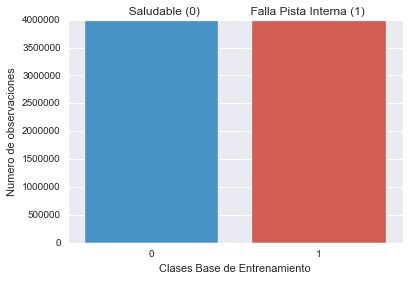

In [107]:
# grafica de clases base de train, estado base equilibrada
sns.countplot(label_train, palette=["#3498db", "#e74c3c"])
plt.title('       Saludable (0)               Falla Pista Interna (1)')
plt.xlabel("Clases Base de Entrenamiento")
plt.ylabel("Numero de observaciones")
plt.savefig('vibraciones entrenamientoapp.png')
pyplot.show()

## Modelo Gradient Boosting ajustado con el 100% de datos para la aplicacion web

In [108]:
# entrenar modelo Gradient Boosting con el 100% de datos para la aplicacion web
modelofinal=GradientBoostingClassifier(max_depth=2, n_estimators=600, learning_rate=0.001, subsample=1, random_state=0)
modelofinal.fit(data_train, label_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
# grabar el modelo en formato pickle
filename = 'model.pkl'
pickle.dump(modelofinal, open(filename, 'wb'))

In [110]:
# leer el modelo grabado de disco 
filename = 'model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [111]:
# prueba de prediccion de una observacion

# prediccion de un nuevo dato

data4 = {'aceleracion':[0.011941], 'velocidad':[0.036675]} 
  
# Create DataFrame 
df4 = pd.DataFrame(data4)

# Ahora encontramos la etiqueta o clase de este nuevo individuo
label_pred = loaded_model.predict(df4)
#etiqueta_nueva_dato
print("Etiqueta nuevo dato: ", label_pred)

# predecir probabilidades
#dato 3
probs3 = loaded_model.predict_proba(df4)
print("probabilidades:", probs3)


Etiqueta nuevo dato:  [0]
probabilidades: [[0.64214046 0.35785954]]


El modelo reentrenado queda guardado en el archivo model.pkl para ejecutarse en el marco Web

* Abrir instructivo para ejecutar aplicacion web para clasificacion de fallas en el servidor local 